# Analysis of the Root Network votes

*Update: the interesting part are the 4 last pie charts giving us the trend of the emissions that each subnet receive across the last 4 months*

The goal of this notebook is to have a better understanding of who is part of the root network (does it change often?) and which subnets they vote for (Do they change their vote often? Who votes for new subnets, who doesn't ?). 

In [1]:
import bittensor as bt
import torch
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
root_metagraph = bt.metagraph(netuid=0, lite=False)

2024-05-27 19:31:41.845 |     WARNING      |  - We strongly encourage running a local subtensor node whenever possible. This increases decentralization and resilience of the network. - 
2024-05-27 19:31:41.845 |     WARNING      |  - In a future release, local subtensor will become the default endpoint. To get ahead of this change, please run a local subtensor node and point to it. - 


In [3]:
W = root_metagraph.W.float()
weights = pd.DataFrame(W.numpy())
new_column_names = [f'SN{i}' for i in range(len(weights.columns))]
weights.columns = new_column_names
print(weights)

         SN0       SN1       SN2       SN3       SN4       SN5      SN6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
1   0.000000  0.091838  0.010204  0.020408  0.040816  0.020408  0.12245   
2   0.045679  0.068663  0.006330  0.026806  0.010439  0.044656  0.00000   
3   0.045100  0.035100  0.045100  0.025100  0.009999  0.035100  0.00000   
4   0.679944  0.010002  0.010002  0.010002  0.000000  0.010002  0.00000   
..       ...       ...       ...       ...       ...       ...      ...   
59  0.000000  0.047618  0.000000  0.000000  0.047618  0.000000  0.00000   
60  0.000000  0.199998  0.000000  0.000000  0.000000  0.000000  0.00000   
61  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
62  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
63  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   

         SN7       SN8       SN9  ...      SN26      SN27      SN28      SN29  \
0   0.000000  0.00

In [4]:
hotkeys = root_metagraph.hotkeys
hotkeys = pd.DataFrame(hotkeys, columns=['hotkeys'])

In [5]:
stakes = pd.DataFrame((root_metagraph.stake.float()).numpy(), columns=['stakes'])

In [6]:
stakes_by_hotkey = pd.concat([hotkeys, stakes], axis=1)
root_network = stakes_by_hotkey.join(weights)

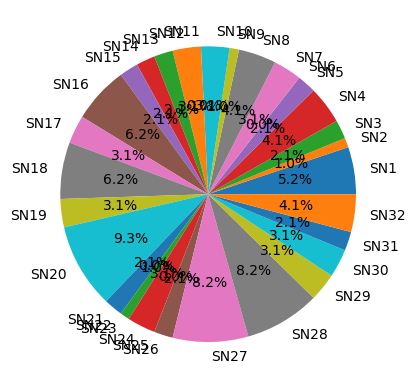

In [7]:
validator5F4t = root_network.iloc[5, 3:35]
plt.pie(validator5F4t, labels=validator5F4t.index, autopct='%1.1f%%')
plt.show()